In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1

In [5]:
# Считываем датасет
df = pd.read_csv('./extra/laptops_10.csv')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


### 1.1 Изучить распределение количества памяти (Memory_Amount) с помощью matplotlib

In [7]:
data = df.groupby('Memory_Amount')['TypeName'].agg(count='count').reset_index().sort_values(by='Memory_Amount')
data

,Memory_Amount,count
0,8,1
1,16,10
2,32,45
3,64,17
4,128,177
5,180,5
6,240,1
7,256,508
8,500,132
9,508,1


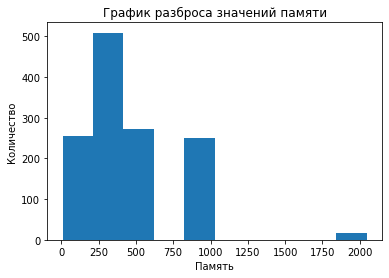

In [25]:
plt.hist(df['Memory_Amount'], bins=10)
plt.title('График разброса значений памяти')
plt.xlabel('Память')
plt.ylabel('Количество');

### 1.2 Изучить распределение стоймости ноутбуков (Price_euros) с помощью matplotlib

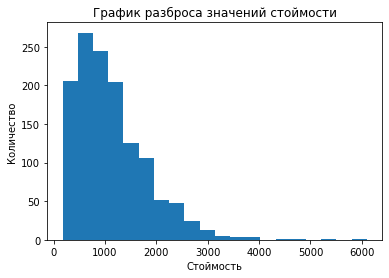

In [27]:
plt.hist(df['Price_euros'], bins=20)
plt.title('График разброса значений стоймости')
plt.xlabel('Стоймость')
plt.ylabel('Количество');

### 1.2 Изучить распределение веса (Weight) с помощью matplotlib

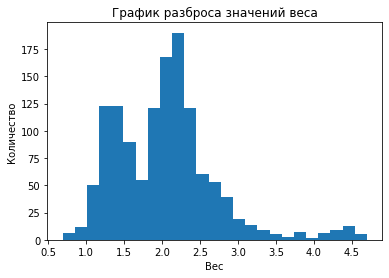

In [29]:
plt.hist(df['Weight'], bins=25)
plt.title('График разброса значений веса')
plt.xlabel('Вес')
plt.ylabel('Количество');

## Задание 2

### 2.1 Изучите распределение типов носителя (Memory_Type)

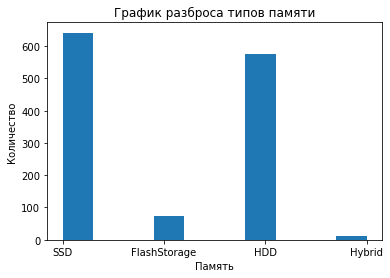

In [31]:
plt.hist(df['Memory_Type'], bins=10)
plt.title('График разброса типов памяти')
plt.xlabel('Память')
plt.ylabel('Количество');

### 2.2 Изучите распределение компаний производителей (Company)

In [146]:
data = df['Company'].value_counts().reset_index()
data.head()

,index,Company
0,Dell,297
1,Lenovo,297
2,HP,274
3,Asus,158
4,Acer,103


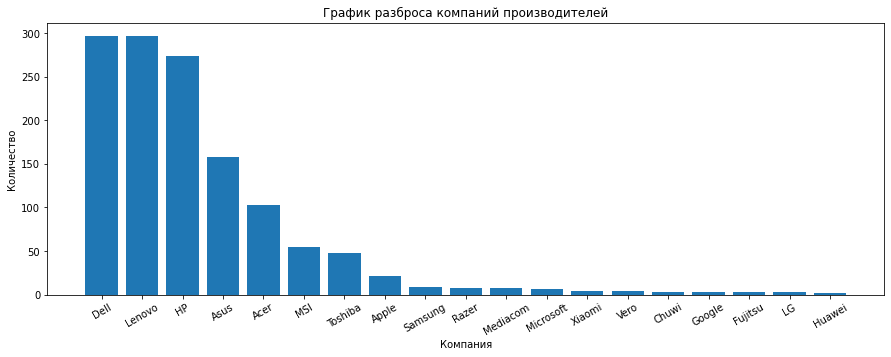

In [147]:
plt.figure(figsize=(15, 5))
plt.bar(data['index'], data['Company'])
plt.title('График разброса компаний производителей')
plt.xlabel('Компания')
plt.ylabel('Количество')
plt.xticks(rotation=30);

### 2.3 Изучите распределение операционной системы (OpSys)

In [53]:
data = df['OpSys'].value_counts().reset_index()
data

,index,OpSys
0,Windows 10,1072
1,No OS,66
2,Linux,62
3,Windows 7,45
4,Chrome OS,27
5,macOS,13
6,Mac OS X,8
7,Windows 10 S,8
8,Android,2


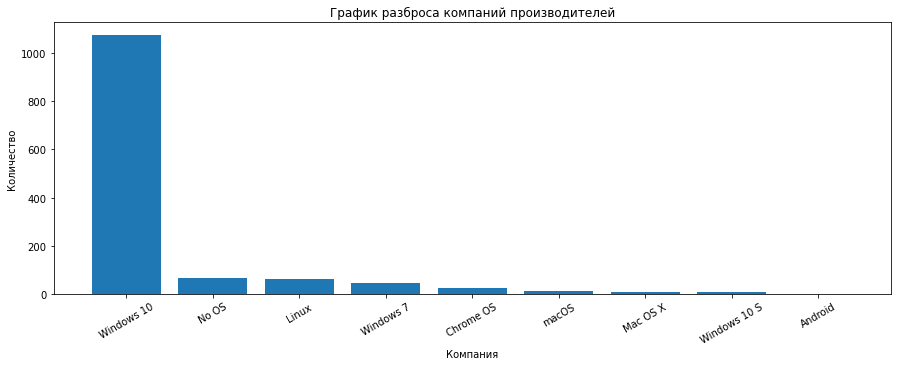

In [52]:
plt.figure(figsize=(15, 5))
plt.bar(data['index'], data['OpSys'])
plt.title('График разброса компаний производителей')
plt.xlabel('Компания')
plt.ylabel('Количество')
plt.xticks(rotation=30);

### 2.3 Изучите распределение компаний производителей CPU (Cpu_Company)

In [54]:
data = df['Cpu_Company'].value_counts().reset_index()
data

,index,Cpu_Company
0,Intel,1240
1,AMD,62
2,Samsung,1


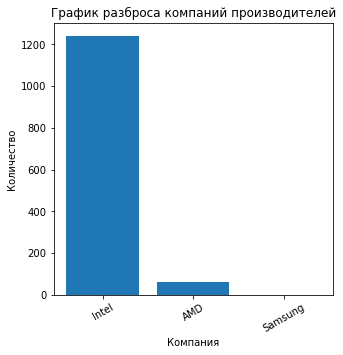

In [56]:
plt.figure(figsize=(5, 5))
plt.bar(data['index'], data['Cpu_Company'])
plt.title('График разброса компаний производителей')
plt.xlabel('Компания')
plt.ylabel('Количество')
plt.xticks(rotation=30);

## Задание 3
Изучите взаимосвязь компаний производителей ноутбуков и производителей процессоров, используя сложенную или многоядровую столбчатую диаграмму

процессоры от Самсунг не изучайте

### 3.1 Постройте график в абсолютных величинах

In [101]:
data = pd.crosstab(df['Company'], df[df['Cpu_Company'] != 'Samsung']['Cpu_Company']).reset_index().sort_values(['AMD', 'Intel'], ascending=False)
data

Cpu_Company,Company,AMD,Intel
7,HP,25,249
10,Lenovo,16,281
2,Asus,11,147
0,Acer,10,93
4,Dell,0,297
11,MSI,0,54
16,Toshiba,0,48
1,Apple,0,21
15,Samsung,0,8
12,Mediacom,0,7


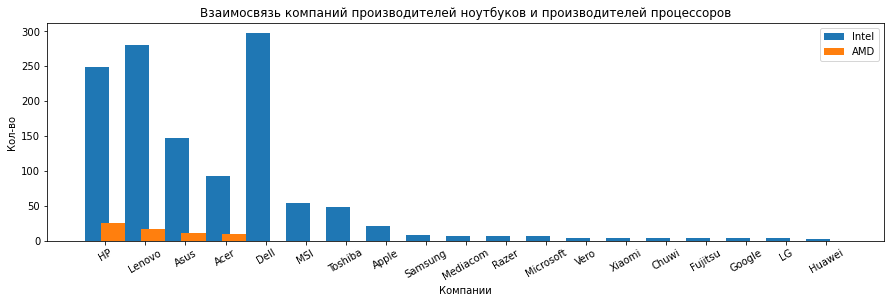

In [102]:
plt.figure(figsize=(15, 4))

# определяем кол-во делений
n_ticks = np.arange(len(data['Company']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.6

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['Intel'], width=w)
plt.bar(n_ticks + offset, data['AMD'], width=w)

plt.title('Взаимосвязь компаний производителей ноутбуков и производителей процессоров')
plt.xlabel('Компании')
plt.ylabel('Кол-во')
plt.legend(['Intel', 'AMD'])
plt.xticks(n_ticks, data['Company'], rotation = 30);  # добавляем метки делений

### 3.1 Постройте график в относительных величинах

In [145]:
data = pd.crosstab(df['Company'], df[df['Cpu_Company'] != 'Samsung']['Cpu_Company'], normalize='index').reset_index().sort_values(['AMD', 'Intel'], ascending=False)
data

Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
7,HP,0.091241,0.908759
2,Asus,0.069620,0.930380
10,Lenovo,0.053872,0.946128
1,Apple,0.000000,1.000000
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000
5,Fujitsu,0.000000,1.000000
6,Google,0.000000,1.000000
8,Huawei,0.000000,1.000000


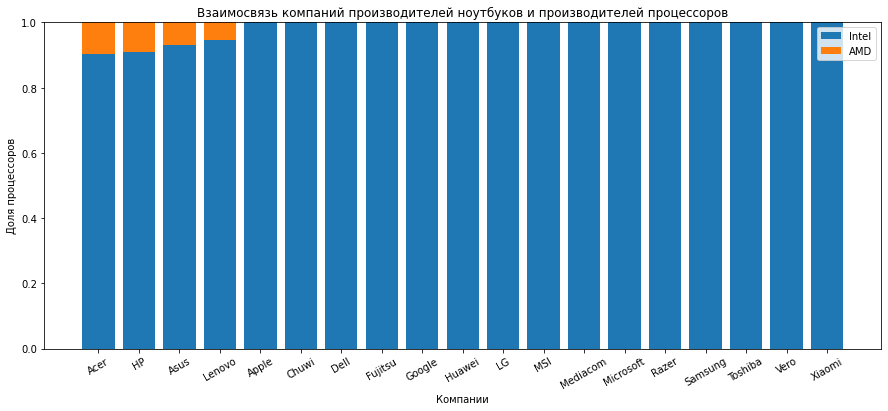

In [104]:
plt.figure(figsize=(15, 6))

plt.bar(data['Company'], data['Intel'])
plt.bar(data['Company'], data['AMD'], bottom=data['Intel'])

plt.title('Взаимосвязь компаний производителей ноутбуков и производителей процессоров')
plt.xlabel('Компании')
plt.ylabel('Доля процессоров')
plt.legend(['Intel', 'AMD'])
plt.xticks(rotation = 30);

## Задание 4

### 4.1 Изучите взаимосвязь стоймости ноутбука и компнии производителя процессора

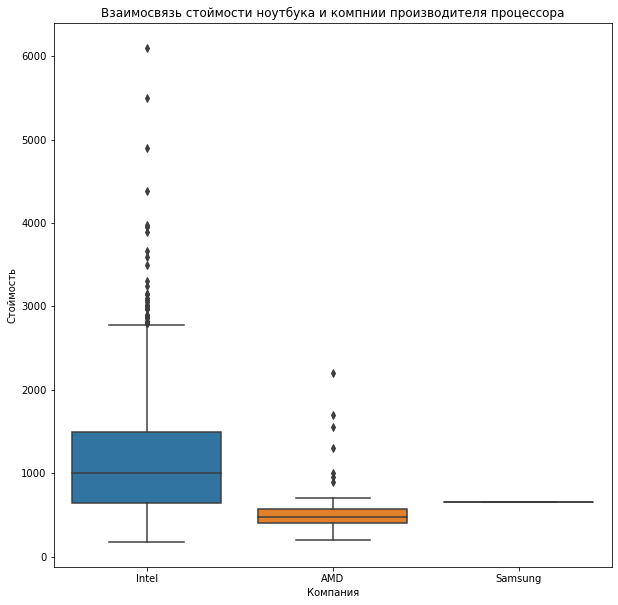

In [148]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['Cpu_Company'],y = df['Price_euros'])
plt.title('Взаимосвязь стоймости ноутбука и компнии производителя процессора')
plt.xlabel('Компания')
plt.ylabel('Стоймость');

### 4.2 Изучите взаимосвязь стоймости ноутбука и типа носителя памяти


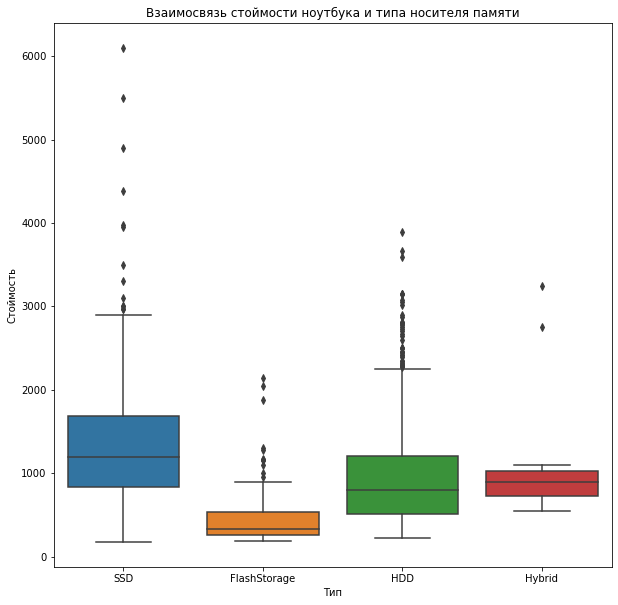

In [138]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['Memory_Type'],y = df['Price_euros'])
plt.title('Взаимосвязь стоймости ноутбука и типа носителя памяти')
plt.xlabel('Тип')
plt.ylabel('Стоймость');

### 4.3 Изучите взаимосвязь стоймости ноутбука и количества оперативной памяти


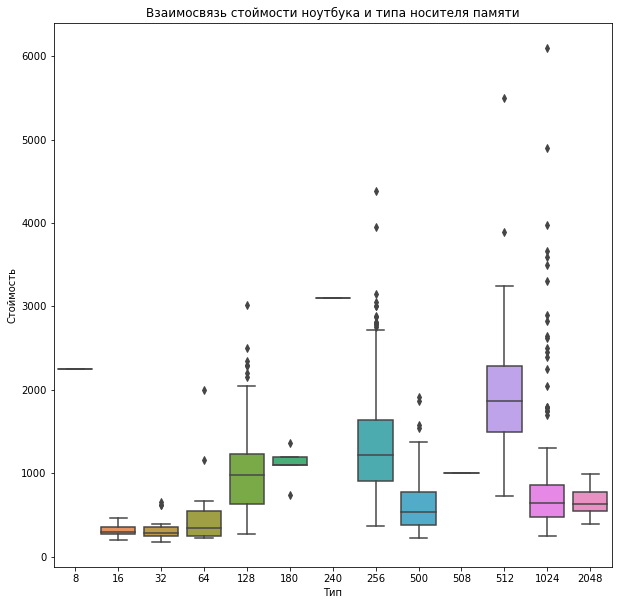

In [139]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['Memory_Amount'],y = df['Price_euros'])
plt.title('Взаимосвязь стоймости ноутбука и типа носителя памяти')
plt.xlabel('Тип')
plt.ylabel('Стоймость');

### 4.4 Изучите взаимосвязь стоймости ноутбука и компнии производителя процессора

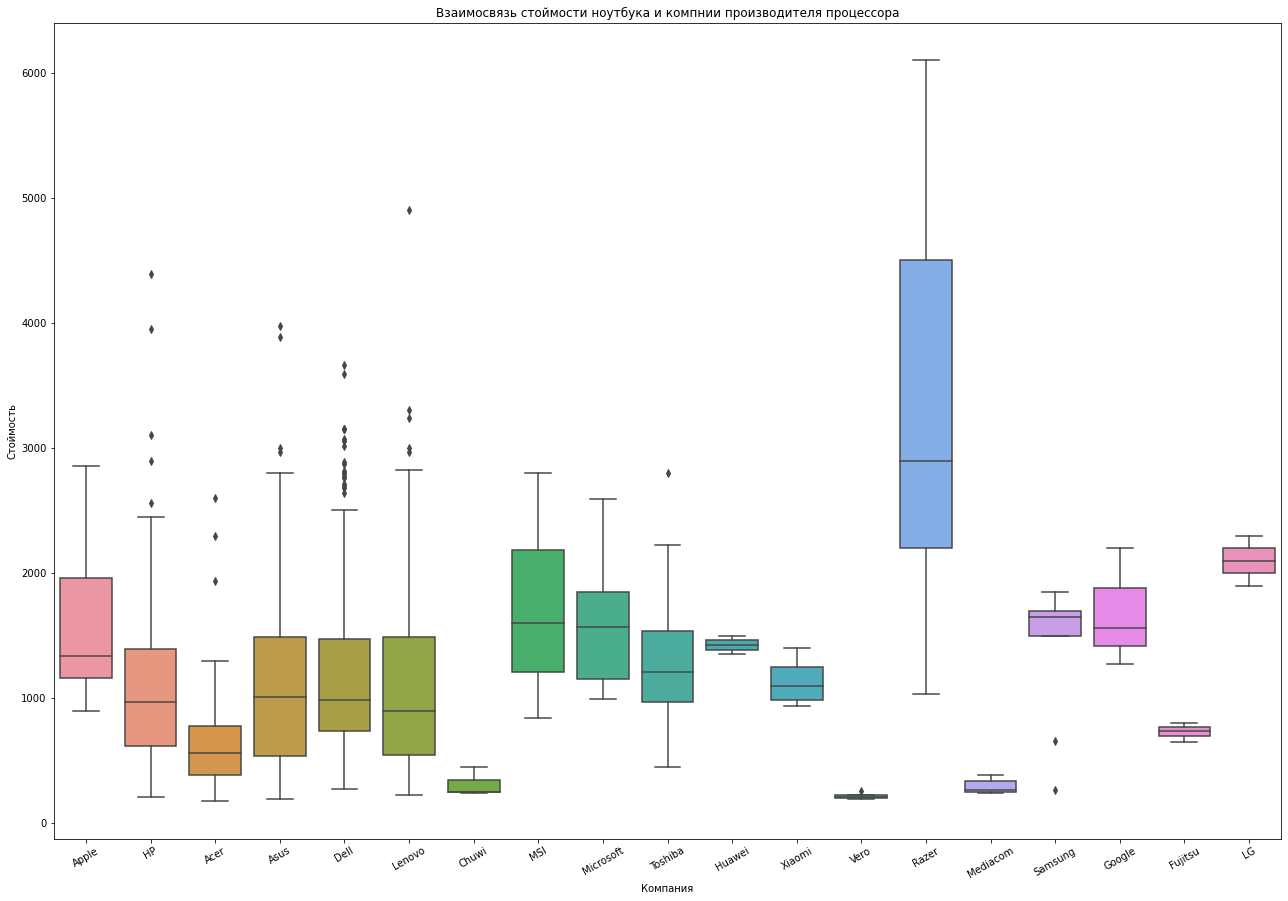

In [144]:
plt.figure(figsize=(22, 15))
sns.boxplot(x=df['Company'],y = df['Price_euros'])
plt.title('Взаимосвязь стоймости ноутбука и компнии производителя процессора')
plt.xlabel('Компания')
plt.ylabel('Стоймость')
plt.xticks(rotation = 30);